Backpropagation is an algorithm for supervised learning of artificial neural networks that uses the gradient descent method to minimize the cost function. It searches for optimal weights that optimize the mean-squared distance between the predicted and actual labels.

In [13]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")


In [14]:
# Function to load ring datasets
def load_ring_dataset(filename):
    df = pd.read_csv(filename, sep="\t", header=None)
    X = df.iloc[:, :-1].values
    y = df.iloc[:, -1].values
    return X, y

# Load the separable ring dataset
X_separable, y_separable = load_ring_dataset('A2-ring-separable.txt')

# Load the merged ring dataset
X_merged, y_merged = load_ring_dataset('A2-ring-merged.txt')

# Load the test ring dataset
X_test_ring, y_test_ring = load_ring_dataset('A2-ring-test.txt')

In [15]:
# Function to create the neural network model
def create_model(input_dim):
    model = Sequential()
    model.add(Dense(12, input_dim=input_dim, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


In [16]:
def load_bank_dataset(filename):
    data = pd.read_csv(filename, sep=';')
    label_encoders = {}
    for column in data.columns:
        if data[column].dtype == object:
            le = LabelEncoder()
            data[column] = le.fit_transform(data[column])
            label_encoders[column] = le
    X = data.iloc[:, :-1].values
    y = data.iloc[:, -1].values
    return X, y, label_encoders

In [17]:
# Training and evaluating for ring-separable dataset
model_separable = create_model(X_separable.shape[1])
model_separable.fit(X_separable, y_separable, epochs=150, batch_size=10, verbose=0)
y_pred_separable = (model_separable.predict(X_test_ring) > 0.5).astype("int32")
print("Classification Report for Ring Separable Dataset:")
print(classification_report(y_test_ring, y_pred_separable))

313/313 [==============================] - 0s 212us/step
Classification Report for Ring Separable Dataset:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5333
           1       0.99      0.99      0.99      4667

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [18]:
# Training and evaluating for ring-merged dataset
model_merged = create_model(X_merged.shape[1])
model_merged.fit(X_merged, y_merged, epochs=150, batch_size=10, verbose=0)
y_pred_merged = (model_merged.predict(X_test_ring) > 0.5).astype("int32")
print("Classification Report for Ring Merged Dataset:")
print(classification_report(y_test_ring, y_pred_merged))

313/313 [==============================] - 0s 211us/step
Classification Report for Ring Merged Dataset:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      5333
           1       0.98      0.94      0.96      4667

    accuracy                           0.96     10000
   macro avg       0.97      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



In [19]:
# Loading bank dataset
X_bank, y_bank, encoders = load_bank_dataset('bank-additional.csv')
train_size = int(0.8 * len(X_bank))
X_train_bank, X_test_bank = X_bank[:train_size], X_bank[train_size:]
y_train_bank, y_test_bank = y_bank[:train_size], y_bank[train_size:]

In [20]:
# Ensure data is in the correct format
X_train_bank = X_train_bank.astype('float32')
y_train_bank = y_train_bank.astype('int32')

In [21]:
# Training for bank dataset
model_bank = create_model(X_train_bank.shape[1])
model_bank.fit(X_train_bank, y_train_bank, epochs=50, batch_size=10, verbose=0)
y_pred_bank = (model_bank.predict(X_test_bank) > 0.5).astype("int32")
print("Classification Report for Bank Marketing Dataset:")
print(classification_report(y_test_bank, y_pred_bank))

26/26 [==============================] - 0s 265us/step
Classification Report for Bank Marketing Dataset:
              precision    recall  f1-score   support

           0       0.98      0.83      0.90       744
           1       0.34      0.84      0.49        80

    accuracy                           0.83       824
   macro avg       0.66      0.83      0.69       824
weighted avg       0.92      0.83      0.86       824



In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split

In [23]:
#ROC Curve
def plot_roc_curve(y_true, y_scores):
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

26/26 [==============================] - 0s 336us/step


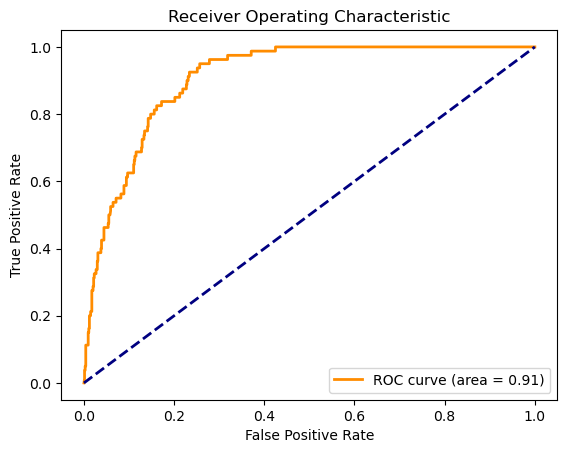

In [24]:
# Plot ROC Curve
y_scores_bank = model_bank.predict(X_test_bank).ravel()
plot_roc_curve(y_test_bank, y_scores_bank)

In [25]:
def load_universal_bank_dataset(filename):
    data = pd.read_csv(filename)
    label_encoders = {}
    for column in data.columns[:-1]:
        if data[column].dtype == object:
            le = LabelEncoder()
            data[column] = le.fit_transform(data[column])
            label_encoders[column] = le
    X = data.iloc[:, :-1].values
    y = data.iloc[:, -1].values
    return X, y, label_encoders

In [26]:
file_path = 'UniversalBank.csv'  
X_bank, y_bank, _ = load_universal_bank_dataset(file_path)

In [27]:
def create_model(input_dim):
    model = Sequential()
    model.add(Dense(12, input_dim=input_dim, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [28]:
# Splitting the dataset into training and testing sets
X_train_bank, X_test_bank, y_train_bank, y_test_bank = train_test_split(X_bank, y_bank, test_size=0.3, random_state=42)

In [29]:
# Training and evaluating for UniversalBank dataset
model_bank = create_model(X_train_bank.shape[1])
model_bank.fit(X_train_bank, y_train_bank, epochs=50, batch_size=10, verbose=0)
y_pred_bank = (model_bank.predict(X_test_bank) > 0.5).astype("int32")
print("Classification Report for UniversalBank Dataset:")
print(classification_report(y_test_bank, y_pred_bank))

47/47 [==============================] - 0s 245us/step
Classification Report for UniversalBank Dataset:
              precision    recall  f1-score   support

           0       0.73      0.49      0.58      1073
           1       0.29      0.54      0.38       427

    accuracy                           0.50      1500
   macro avg       0.51      0.51      0.48      1500
weighted avg       0.60      0.50      0.53      1500



In [30]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import KFold

def create_bp_model(input_shape):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(input_shape,)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid')) 

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

def cross_validate_bp_model(X, y, n_splits=5):
    kf = KFold(n_splits=n_splits)
    accuracies = []

    for train_index, val_index in kf.split(X):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]

        model = create_bp_model(X_train.shape[1])
        model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

        _, accuracy = model.evaluate(X_val, y_val, verbose=0)
        accuracies.append(accuracy)

    return np.mean(accuracies)

def evaluate_on_test_set(model, X_test, y_test):
    _, accuracy = model.evaluate(X_test, y_test, verbose=0)
    return accuracy

In [31]:
cv_error_bp = cross_validate_bp_model(X_bank, y_bank)

bp_model = create_bp_model(X_bank.shape[1])
bp_model.fit(X_bank, y_bank, epochs=10, batch_size=32, verbose=0)
test_error_bp = evaluate_on_test_set(bp_model, X_train_bank, y_train_bank)

print("BP Cross-Validation Error:", cv_error_bp)
print("BP Test Set Error:", test_error_bp)

BP Cross-Validation Error: 0.5424000084400177
BP Test Set Error: 0.7020000219345093


In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score

def compute_classification_error(y_true, y_pred):
    error = 1 - accuracy_score(y_true, y_pred)
    return error

def generate_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    return cm

y_pred_bp = bp_model.predict(X_bank)
y_pred_bp = (y_pred_bp > 0.5).astype(int)  

error_bp = compute_classification_error(y_bank, y_pred_bp)
cm_bp = generate_confusion_matrix(y_bank, y_pred_bp)

print("Classification Error (BP):", error_bp)
print("Confusion Matrix (BP):\n", cm_bp)

157/157 [==============================] - 0s 239us/step
Classification Error (BP): 0.29400000000000004
Confusion Matrix (BP):
 [[3530    0]
 [1470    0]]


157/157 [==============================] - 0s 249us/step


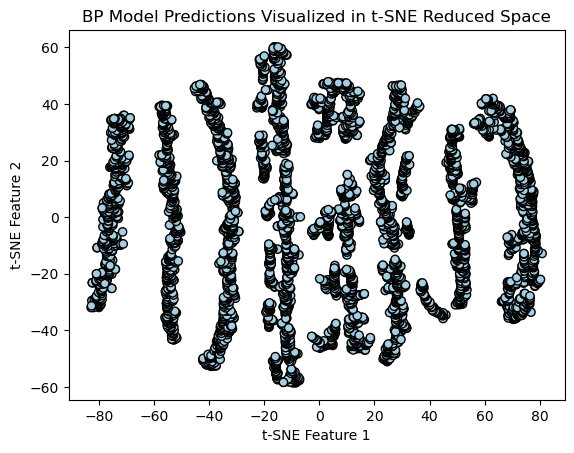

In [33]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Dimensionality Reduction using t-SNE
tsne = TSNE(n_components=2, random_state=0)
X_reduced = tsne.fit_transform(X_bank)

y_pred = bp_model.predict(X_bank)
y_pred_classes = np.argmax(y_pred, axis=1)

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_pred_classes, cmap=plt.cm.Paired, edgecolors='k')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.title('BP Model Predictions Visualized in t-SNE Reduced Space')
plt.show()

In [34]:
from sklearn.model_selection import KFold
from keras.models import Sequential
from keras.layers import Dense
import numpy as np

def create_bp_model(input_shape):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(input_shape,)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))  # Adjust the last layer based on your problem
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

kf = KFold(n_splits=5)  
accuracies = []

for train_index, val_index in kf.split(X_bank):
    
    X_train, X_val = X_bank[train_index], X_bank[val_index]
    y_train, y_val = y_bank[train_index], y_bank[val_index]

    model = create_bp_model(X_train.shape[1])
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

    _, accuracy = model.evaluate(X_val, y_val, verbose=0)
    accuracies.append(accuracy)

# Calculate the average performance across all folds
average_accuracy = np.mean(accuracies)
print("Average Accuracy:", average_accuracy)

Average Accuracy: 0.5340000033378601
